In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# dataset preparation

In [3]:
from sklearn.datasets import make_blobs

In [4]:
make_blobs?

In [9]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=10)

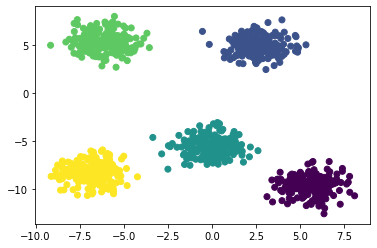

In [10]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

In [11]:
# KMeans Implementation 

In [12]:
# initial preparation 
k = 5

color = ["green", "red", "blue", "yellow", "gray"]

clusters = {}

for i in range(k):
    
    # initialise centers randomly 
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    cluster = {
        'center':center,
        'points':points, 
        'color': color[i]
    }
    clusters[i] = cluster

In [13]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [14]:
# step 2 
# Assign every data point to one of its clusters 
# E-step 
def assignPointToClusters(clusters):
    
    for i in range(X.shape[0]):
        dist = []
        curr_x = X[i]
        
        for kx in range(k):
            d = distance(curr_x, clusters[kx]['center'])
            dist.append(d)
        
        # minimum distance 
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)

In [15]:
# STEP 3 
# UPDATE CLUSTER CENTER ACCORDING TO MEAN VALUE OF DATA POINTS
# M-Step

In [16]:
def updateClusterCenter(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0 :
            mu = pts.mean(axis=0)
            clusters[kx]['center'] = mu
            clusters[kx]['points'] = [] # clear the list

In [17]:
def plotClusters(clusters):
    for kx in range(k):
        
        pts = np.array(clusters[kx]['points'])
        
        #plot the points 
        try:
            plt.scatter(pts[:,0], pts[:,1], color=clusters[kx]['color'])
        except:
            pass
        
        # plot the cluster center 
        uk = clusters[kx]['center']
        plt.scatter(uk[0], uk[1], color='black', marker="*")

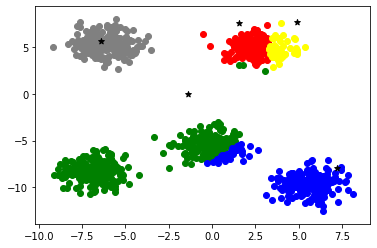

In [18]:
assignPointToClusters(clusters)
plotClusters(clusters)

In [21]:
# repeat these three functions few times 
count = 1
while True:
    assignPointToClusters(clusters)
    updateClusterCenter(clusters)
    count+=1
    if count>100:
        break

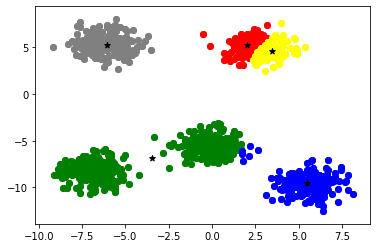

In [23]:
assignPointToClusters(clusters)
plotClusters(clusters)